In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import metrics
from math import sqrt
from prepare import percentage_stacked_plot
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Top Military Strengths by Defense Budget

### Project Description and Goals
This is an analysis of the top 25 militaries by country with the highest defense budget. This would deliver insight into current and future capabilities at a glance. My overall goal here is to show the features that are related to defense budget and how this makes a force not to be reckoned with. In the future with more available data, we can deliver critical insight into the current and future size, shape, and capabilities of the world's key military powers.

### Data Aquisition

In [2]:
# acquires the data frame from acquire function
df = acquire.acquire_military()

### Data Preparation

In [3]:
# prepares data frame from prepare function
df = prepare.prep_military(df)
df.head()

,country,country_code,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,...,square_land_area,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength
132,United States,USA,1390000,20,45193,2837,1693,147399295,22,770000000000,...,9826675,68,627,6612,334998398,2661,982,25447,220,56008
26,China,CHN,2000000,3,35000,5854,652,754864769,70,250240000000,...,9596961,79,3,5250,1397897720,399,286,5651,430,49264
103,Russia,RUS,850000,1,30122,14145,1283,69737187,86,154000000000,...,17098242,70,20,12420,142320790,522,445,8118,291,60078
131,United Kingdom,UKD,194000,2,5015,215,47,30857260,0,68000000000,...,243610,10,9,227,67081000,247,40,1291,67,5501
44,Germany,GER,184000,0,9217,121,130,36755601,5,50300000000,...,357022,6,0,266,79903481,37,43,1155,35,9642


#### Data Preparation Summary:
Before data preparation there were over 40 different measurements of military power from 140 different countries.
- Step taken to clean and prep data:
    1. renamed columns (avoided spacing for easier coding)
    2. inspected data frame and found zeros or outliers where they likely should not be such as:
        1. changed to mean of entire feature.
        2. replaced outliers with zero.
    3. created additional features by grouping some that could be fit into one feature such as:
        1. attack_aircraft = any attack type aircraft.
        2. air_carriers = any air type carriers.
        3. arty = any type artillery.
        4. grouped air, land, and sea strengths into each individual category.
    4. Dropped columns that were not neccessary for this quick analysis (please see prepare.py file for feature drops)
    5. resorted the column titles.
    6. Only took the top 25 countries by highest defense budget.

### Initial thoughts before exploration:
- USA has the strongest military power because we have the highest defense budget.
- Smaller countries have less military power.
- The more the country is in debt the more the country has to spend.
- The greater the population the higher the defense budget.

Text(0.5, 0.98, 'Top Countries by Defense Budget')

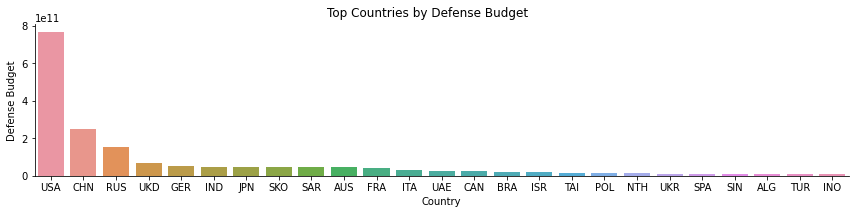

In [4]:
# Plots the countries by defense budget.
p = sns.catplot(kind='bar', data=df, x='country_code', y='defense_budget', height=3, aspect=4)
(p.set_axis_labels("Country", "Defense Budget"))  
p.fig.suptitle('Top Countries by Defense Budget')

### Clearly USA has the highest defense budget. Now let's further explore what drives the defense budget on Train data frame.

In [5]:
# splits the data
df = prepare.split_military(df)

Train: 14 rows, 37 cols
Validate: 6 rows, 37 cols
Test: 5 rows, 37 cols


In [6]:
train, validate, test = df
train.shape

(14, 37)

In [7]:
train.head(25).T

,22,26,104,98,58,17,132,114,44,112,130,103,56,41
country,Canada,China,Saudi Arabia,Poland,Japan,Brazil,United States,Spain,Germany,South Korea,United Arab Emirates,Russia,Italy,France
country_code,CAN,CHN,SAR,POL,JPN,BRA,USA,SPA,GER,SKO,UAE,RUS,ITA,FRA
active_personnel,70000,2000000,225000,120000,240000,360000,1390000,120000,184000,555000,65000,850000,170000,205000
air_carriers,0,3,0,0,4,1,20,1,0,2,0,1,2,4
armored_vehicles,1534,35000,6202,4786,5500,1958,45193,5033,9217,13990,9255,30122,6908,6558
arty,163,5854,2523,609,694,682,2837,236,121,6894,259,14145,162,214
attack_aircraft,0,652,115,30,142,89,1693,35,130,202,50,1283,154,69
avail_manpower,16315589,754864769,18087554,18711097,53615536,108857163,147399295,21739869,36755601,25857581,5716835,69737187,28075664,29957055
corvettes,0,70,4,2,6,2,22,0,5,11,9,86,0,0
defense_budget,23550574382,250240000000,46000000000,14500000000,47482740000,18785000000,770000000000,11750000000,50300000000,46320000000,25266000000,154000000000,29198401050,40900000000


<AxesSubplot:>

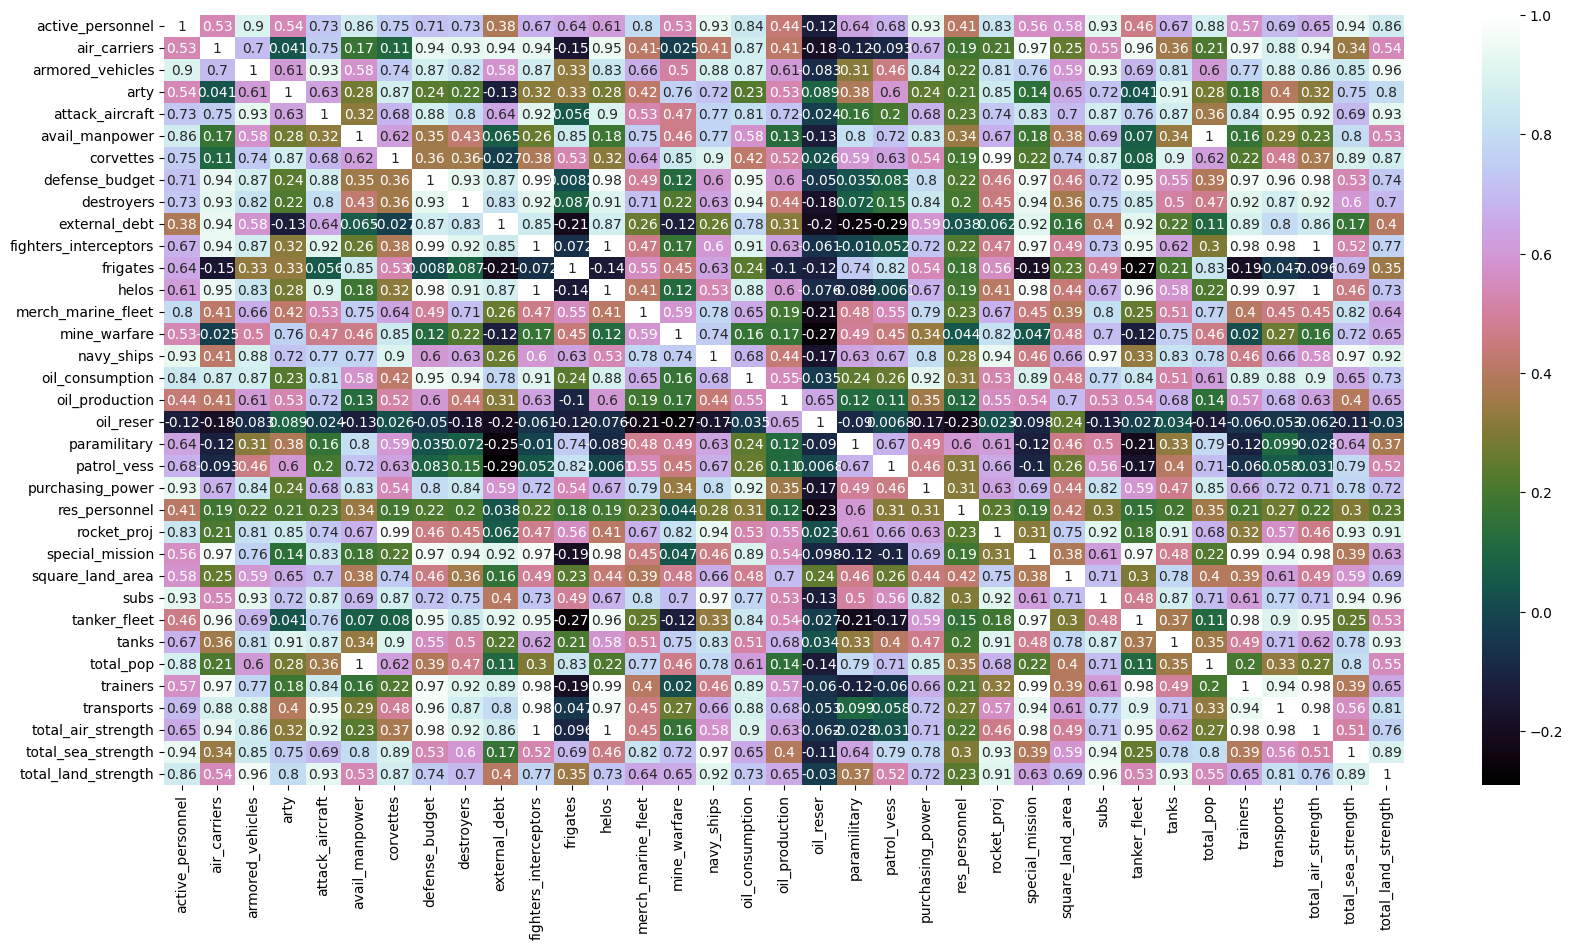

In [8]:
# Using heatmap visualize relationships between variables in high dimensional space.
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),annot=True, cmap='cubehelix')

### Now let's visualise the relationships between defense budget and other added features.

Text(0.5, 1.0, 'Active Personnel by Defense Budget')

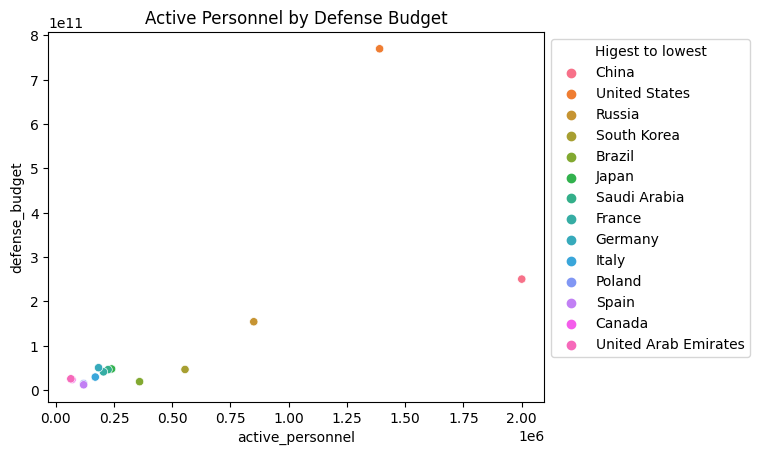

In [9]:
# plots total population by defense budget with hue of country.
sns.scatterplot(x='active_personnel', y='defense_budget', hue='country',
                data=train.sort_values('active_personnel',ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1), title='Higest to lowest')
plt.title("Active Personnel by Defense Budget")

Text(0.5, 1.0, 'Air Strength by Defense Budget')

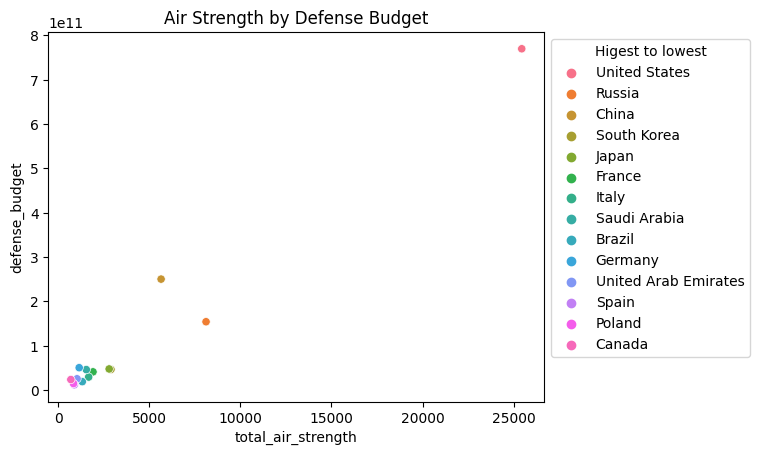

In [10]:
# plots air strength by defense budget with hue of country.
sns.scatterplot(x='total_air_strength', y='defense_budget', hue='country',
                data=train.sort_values('total_air_strength',ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1), title='Higest to lowest')
plt.title("Air Strength by Defense Budget")

Text(0.5, 1.0, 'Total Sea Strength by Defense Budget')

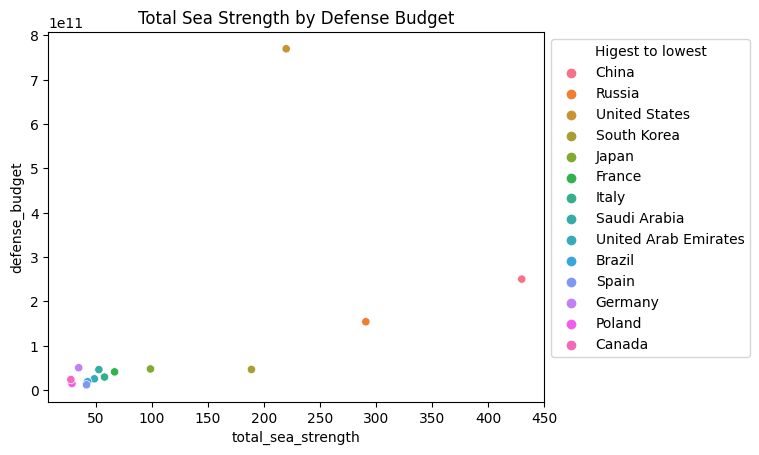

In [11]:
# plots total sea strength by defense budget with hue of country.
sns.scatterplot(x='total_sea_strength', y='defense_budget', hue='country',
                data=train.sort_values('total_sea_strength',ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1), title='Higest to lowest')
plt.title("Total Sea Strength by Defense Budget")

Text(0.5, 1.0, 'Total Land Strength by Defense Budget')

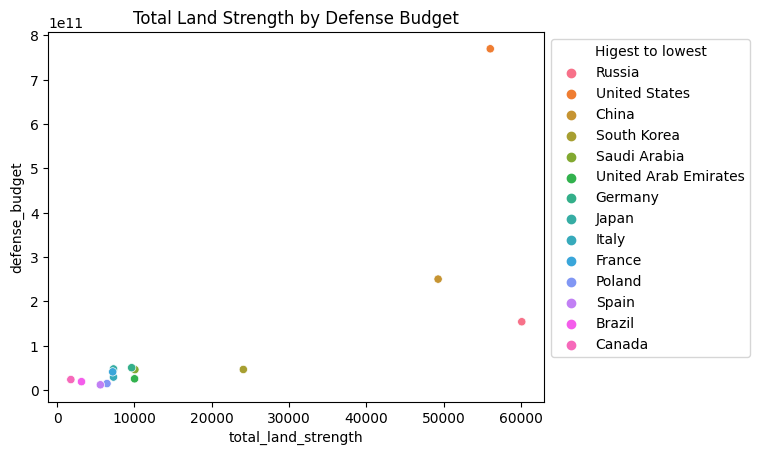

In [12]:
# plots total land strength by defense budget with hue of country.
sns.scatterplot(x='total_land_strength', y='defense_budget', hue='country',
                data=train.sort_values('total_land_strength',ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1), title='Higest to lowest')
plt.title("Total Land Strength by Defense Budget")

Text(0.5, 1.0, 'Total Square Land Area by Defense Budget')

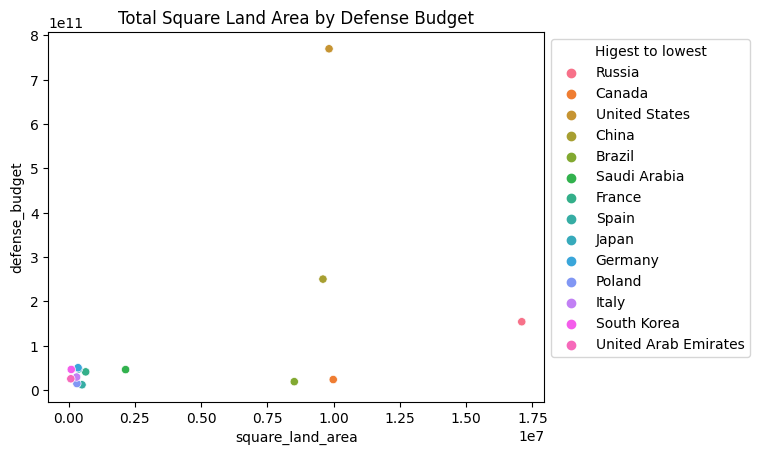

In [13]:
# plots total land strength by defense budget with hue of country.
#plt.figure(figsize = (8,5))
sns.scatterplot(x='square_land_area', y='defense_budget', hue='country',
                data=train.sort_values('square_land_area',ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1), title='Higest to lowest')
plt.title("Total Square Land Area by Defense Budget")

### Based off these several visualizations, USA, Russia, and China are always in the top three. Lets create a new dataframe that ranks each individual feature from 1 being the highest to 14 being the lowest.

In [14]:
# ranks the countries by feature
rank1=train.rank(ascending=False,method='min')
rank1['country']=train['country']
rank1['country_code']=train['country_code']

# Ranks each feature of train (14)  in order by defense budgets
rank2=rank1.sort_values('defense_budget', ascending=True).head(14)
rank2=rank2.set_index('country_code')
rank2=rank2.T
rank2=rank2.drop('country', axis=0)
rank2

country_code,USA,CHN,RUS,GER,JPN,SKO,SAR,FRA,ITA,UAE,CAN,BRA,POL,SPA
active_personnel,2.0,1.0,3.0,9.0,6.0,4.0,7.0,8.0,10.0,14.0,13.0,5.0,11.0,11.0
air_carriers,1.0,4.0,7.0,10.0,2.0,5.0,10.0,2.0,5.0,10.0,10.0,7.0,10.0,7.0
armored_vehicles,1.0,2.0,3.0,6.0,10.0,4.0,9.0,8.0,7.0,5.0,14.0,13.0,12.0,11.0
arty,4.0,3.0,1.0,14.0,6.0,2.0,5.0,11.0,13.0,9.0,12.0,7.0,8.0,10.0
attack_aircraft,1.0,3.0,2.0,7.0,6.0,4.0,8.0,10.0,5.0,11.0,14.0,9.0,13.0,12.0
avail_manpower,2.0,1.0,4.0,6.0,5.0,9.0,12.0,7.0,8.0,14.0,13.0,3.0,11.0,10.0
corvettes,3.0,2.0,1.0,7.0,6.0,4.0,8.0,11.0,11.0,5.0,11.0,9.0,9.0,11.0
defense_budget,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
destroyers,1.0,2.0,4.0,8.0,3.0,5.0,8.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0
external_debt,1.0,8.0,10.0,3.0,4.0,11.0,14.0,2.0,5.0,13.0,7.0,9.0,12.0,6.0


### Which features is USA rank as number 1?

In [15]:
# takes the number one positions from ranked data frame for USA.
df_usa=pd.DataFrame(rank2[rank2['USA']==1.0].index)
df_usa.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,air_carriers,armored_vehicles,attack_aircraft,defense_budget,destroyers,external_debt,fighters_interceptors,helos,oil_consumption,oil_production,special_mission,tanker_fleet,trainers,transports,total_air_strength


In [16]:
# lists the features where USA is ranked number 1.
np.array(df_usa[0])

array(['air_carriers', 'armored_vehicles', 'attack_aircraft',
       'defense_budget', 'destroyers', 'external_debt',
       'fighters_interceptors', 'helos', 'oil_consumption',
       'oil_production', 'special_mission', 'tanker_fleet', 'trainers',
       'transports', 'total_air_strength'], dtype=object)

## USA has 15 features where they are ranked No. 1!!! that is 43% of the selected features.

### How many features does C-H-I-N-A have as no. 1?

In [17]:
# Lists the features where China is ranked number 1.
df_china=pd.DataFrame(rank2[rank2['CHN']==1.0].index)
np.array(df_china.T)

array([['active_personnel', 'avail_manpower', 'frigates',
        'merch_marine_fleet', 'navy_ships', 'paramilitary',
        'patrol_vess', 'purchasing_power', 'subs', 'total_pop',
        'total_sea_strength']], dtype=object)

### How many features does Russia have as no. 1?

In [18]:
# Lists the features where Russia is ranked number 1.
df_russia=pd.DataFrame(rank2[rank2['RUS']==1.0].index)
np.array(df_russia.T)

array([['arty', 'corvettes', 'mine_warfare', 'rocket_proj',
        'square_land_area', 'tanks', 'total_land_strength']], dtype=object)

### Preprocessing for Modeling

In [19]:
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test)
# removes country and country code

train_scaled

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,destroyers,external_debt,...,square_land_area,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength
22,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,-0.588751,-0.441740,-0.599111,-0.256408,...,1.064035,-0.627702,-0.285249,-0.643377,-0.436506,-0.420436,-0.526671,-0.525668,-0.755848,-0.836658
26,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,2.070124,0.727913,1.038458,-0.275550,...,0.991780,2.095798,-0.304028,0.869890,3.498032,-0.004799,0.462781,0.262806,2.671963,1.550341
104,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.436815,-0.325907,-0.599111,-0.635518,...,-0.396112,-0.772955,-0.185099,-0.356418,-0.445647,-0.331371,-0.475220,-0.390701,-0.542676,-0.420284
98,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.512783,-0.488438,-0.599111,-0.606554,...,-0.738461,-0.736642,-0.322806,-0.414689,-0.435804,-0.478250,-0.475220,-0.502431,-0.747321,-0.601602
58,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,-0.360847,-0.318257,0.838755,0.164093,...,-0.726305,-0.010375,-0.278990,-0.373402,-0.185543,0.035827,-0.435642,-0.190957,-0.150439,-0.559276
17,-0.195703,-0.343418,-0.837851,-0.478515,-0.483425,0.071981,-0.512783,-0.466329,-0.599111,-0.541473,...,0.790120,-0.518762,-0.310287,-0.538842,0.071246,-0.300120,-0.174426,-0.425716,-0.627945,-0.767388
132,1.668254,3.462801,2.458622,0.080077,2.711332,0.278238,0.246895,3.409727,3.075434,3.327976,...,1.034590,1.696351,3.601832,1.268704,0.422916,3.529676,3.217416,3.413519,0.881315,1.889352
114,-0.630023,-0.343418,-0.603396,-0.594122,-0.590979,-0.394225,-0.588751,-0.502627,-0.599111,-0.214155,...,-0.702552,-0.700328,-0.322806,-0.571637,-0.409550,-0.365747,-0.475220,-0.495110,-0.636472,-0.644783
44,-0.514204,-0.543746,-0.284385,-0.623930,-0.401763,-0.313869,-0.398831,-0.303720,-0.599111,0.443953,...,-0.730199,-0.555075,-0.322806,-0.589499,-0.315109,-0.570440,-0.498967,-0.452774,-0.696160,-0.441397
112,0.157182,-0.143091,0.079535,1.131680,-0.258358,-0.372189,-0.170928,-0.324256,-0.119822,-0.585627,...,-0.778150,0.025938,-0.297768,0.100958,-0.396662,-0.176679,-0.506882,-0.175041,0.616982,0.284480


In [20]:
# Creates simple model based on bathrooms, bedrooms and square_feet. Compares against baseline(median tax value)
X_train = train_scaled[['total_air_strength', 'total_sea_strength', 'total_land_strength', 'square_land_area']]
y_train = train_scaled[['defense_budget']]
y_train['y_baseline'] = train_scaled['defense_budget'].median()

# predictor/independent features split into train, test, validate
X_train = train_scaled.drop(columns = ['defense_budget'],axis=1)
X_validate = validate_scaled.drop(columns = ['defense_budget'],axis=1)
X_test = test_scaled.drop(columns = ['defense_budget'],axis=1)

# target variables split into train, test, validate
# y_train = train.tax_value
y_validate = validate_scaled.defense_budget
y_test = test_scaled.defense_budget
y_train.head(3)

,defense_budget,y_baseline
22,-0.441740,-0.339064
26,0.727913,-0.339064
104,-0.325907,-0.339064


In [21]:
# Calculates baseline (based on median) RMSE
rmse_baseline = sqrt(mean_squared_error(y_train.defense_budget, y_train.y_baseline))
rmse_baseline

1.0559188599573448

In [22]:
# Creates OLS model based on bathrooms, bedrooms, and square_feet
# generates parameters (creates model)
ols_model = ols('defense_budget ~ total_air_strength + total_sea_strength + total_land_strength + square_land_area', data = train_scaled).fit()

# computes predictions and add to original dataframe
y_train['yhat'] = ols_model.predict(X_train)
y_train.head(3)

,defense_budget,y_baseline,yhat
22,-0.441740,-0.339064,-0.517367
26,0.727913,-0.339064,0.510402
104,-0.325907,-0.339064,-0.438626


In [23]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         defense_budget   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     103.4
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           1.62e-07
Time:                        19:11:27   Log-Likelihood:                 7.0781
No. Observations:                  14   AIC:                            -4.156
Df Residuals:                       9   BIC:                           -0.9610
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.776e-17      0.049   5.71e-16      1.000      -0.110       0.110
total_air_strength      1.1089      0.092     12.039      0.000       0.901       1.317
total_sea_strength      0.2903      0.131      2.216      0.054      -0.006       0.587
total_land_strength    -0.3529      0.188     -1.879      0.093      -0.778       0.072
square_land_area       -0.0097      0.068     -0.141      0.891      -0.165       0.145
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.465
Skew:                          -0.177   Prob(JB):                        0.792
Kurtosis:                       2.180   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
rmse = sqrt(mean_squared_error(y_train.defense_budget, y_train.yhat))
rmse

0.145945775443881

In [25]:
# make a dataframe 'predictions' with actual tax_values
predictions = pd.DataFrame({
    'actual': y_train.defense_budget
})
predictions.head()

,actual
22,-0.441740
26,0.727913
104,-0.325907
98,-0.488438
58,-0.318257


In [26]:
X_train1 = X_train[['total_air_strength', 'total_air_strength', 'total_land_strength', 'square_land_area']]
y_train1 = y_train[['defense_budget']]

In [27]:
#linear regression model
lm = LinearRegression()
# fit our train data on the model
lm.fit(X_train1, y_train1)
print("Linear Model:", lm)
print("intercept: ", lm.intercept_)
print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [1.44647524e-17]
coefficients:  [[ 0.49527101  0.49527101  0.01114449 -0.03274408]]


In [28]:
#predictions from linear regresssion model based on X_train independent variable values
predictions['yhat_lm'] = lm.predict(X_train1)
#Baseline predicted home value (median home price)
predictions['baseline'] = y_train.defense_budget.median()
predictions.head(3)

,actual,yhat_lm,baseline
22,-0.441740,-0.564862,-0.339064
26,0.727913,0.245123,-0.339064
104,-0.325907,-0.378720,-0.339064


In [29]:
# Use lamda and calculate RMSE for each columns in prediction dataframe
pd.options.display.float_format = '{:.10f}'.format
predictions.apply(lambda col: sqrt(mean_squared_error(predictions.actual, col)))

actual     0.0000000000
yhat_lm    0.1814332733
baseline   1.0559188600
dtype: float64

In [30]:
rmse

0.145945775443881

In [31]:
rmse < rmse_baseline

True

In [32]:
#using test data and predicting tax values based on linear model above
X_test = test_scaled[['total_air_strength', 'total_sea_strength', 'total_land_strength', 'square_land_area']]
y_test = test_scaled[['defense_budget']]
y_test['test_prediction'] = lm.predict(X_test)
y_test.rename(columns = {'defense_budget': 'actual'}, inplace = True)
y_test.head()

,actual,test_prediction
50,-0.3073321053,0.3088632331
107,-0.5036076969,-0.6059393890
2,-0.5132047684,-0.5412358826
84,-0.4896764641,-0.6829561823
55,-0.4714110699,-0.4664933857


In [33]:
#Calculating RMSE for test predictions
y_test.apply(lambda col: sqrt(mean_squared_error(y_test.actual, col)))

actual            0.0000000000
test_prediction   0.2926894077
dtype: float64

In [34]:
#compare baseline
rmse_baseline

1.0559188599573448

In [35]:
# create model object
lars = LassoLars(alpha=1.0)
# assign x_train/x_validate
x_train = train_scaled.drop(columns = ['defense_budget'])
x_validate = validate_scaled.drop(columns = ['defense_budget'])
# fit the model to our training data. Specify the column in y_train.
lars.fit(x_train, y_train['defense_budget'])
# predict train
y_train['lars_train_pred'] = lars.predict(x_train)
# predict validate
y_validate['lars_validate_pred'] = lars.predict(x_validate)
y_train.head()

,defense_budget,y_baseline,yhat,lars_train_pred
22,-0.4417397400,-0.3390643579,-0.5173668265,-0.0000000000
26,0.7279132861,-0.3390643579,0.5104020496,-0.0000000000
104,-0.3259070825,-0.3390643579,-0.4386259972,-0.0000000000
98,-0.4884381323,-0.3390643579,-0.5546269194,-0.0000000000
58,-0.3182565654,-0.3390643579,-0.0510075646,-0.0000000000


In [36]:
# create the model object
twr = TweedieRegressor()
# fit the model to our training data. Specify the column in y_train
twr.fit(x_train, y_train['defense_budget'])
# predict train
y_train['twr_train_pred'] = twr.predict(x_train)
# predict validate
y_validate['twr_validate_pred'] = twr.predict(x_validate)
y_train.head(3)

,defense_budget,y_baseline,yhat,lars_train_pred,twr_train_pred
22,-0.4417397400,-0.3390643579,-0.5173668265,-0.0000000000,-0.4377091514
26,0.7279132861,-0.3390643579,0.5104020496,-0.0000000000,0.6851550073
104,-0.3259070825,-0.3390643579,-0.4386259972,-0.0000000000,-0.3430191102


In [37]:
# Standardize data using PCA (principal component analysis)
pca = PCA()
pca.fit(train_scaled)

PCA()

In [38]:
# shows how much variance is explained by each of the 14 individual components
pca.explained_variance_ratio_

array([5.71291444e-01, 2.20091079e-01, 8.75407545e-02, 4.47102621e-02,
       3.40479374e-02, 1.73038755e-02, 1.15362751e-02, 5.89626273e-03,
       3.46480795e-03, 1.86736439e-03, 1.33634683e-03, 7.51433718e-04,
       1.62156046e-04, 2.82512788e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

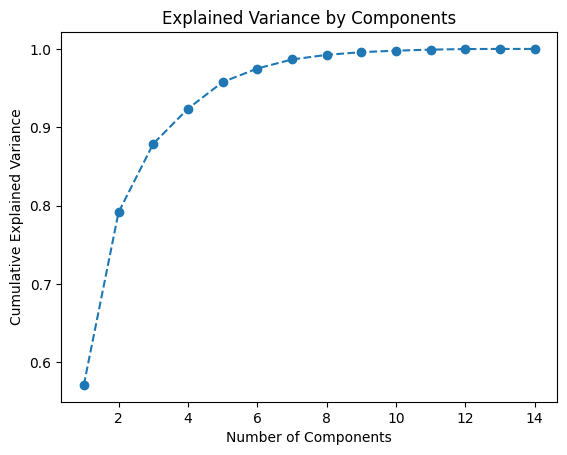

In [39]:
#plt.figure(figsize = (10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [40]:
# we choose three components which is above 80%
pca = PCA(n_components = 3)
# fit the model to our data with the selected number of compenents = 3
pca.fit(train_scaled)

PCA(n_components=3)

In [41]:
# will only need the caluculated resulting components scores for the lements in our data set.
pca.transform(train_scaled)

array([[-2.92676905,  0.62723096,  0.73152042],
       [ 7.73264862, -6.63521674, -3.02985538],
       [-2.29229079,  0.3519466 ,  1.67125441],
       [-3.14393528,  0.38816039,  0.15052011],
       [-0.94719555,  0.7494666 , -1.05179722],
       [-1.81983106, -0.5045965 , -0.86310338],
       [11.26359612,  6.99460135, -0.52813253],
       [-2.97390517,  0.38578015, -0.5494661 ],
       [-2.56574137,  0.65581023, -0.57386393],
       [-0.46785268, -1.30445477, -0.14253044],
       [-2.9987284 ,  0.62763115,  0.53360928],
       [ 5.5571516 , -3.21123762,  5.12025171],
       [-2.40927378,  0.29492807, -0.69846937],
       [-2.00787322,  0.57995014, -0.76993758]])

In [42]:
train_model = pca.transform(train_scaled)

## Now we will incorporate newly obtained PCA scores in the kmeans algorithm.

In [43]:
# within cluster sum of squares = wcss. Fit K Means using the transformed data from the PCA.
wcss = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(train_model)
    wcss.append(kmeans_pca.inertia_)

## Now plot the WCSS against the number of components on a graph.

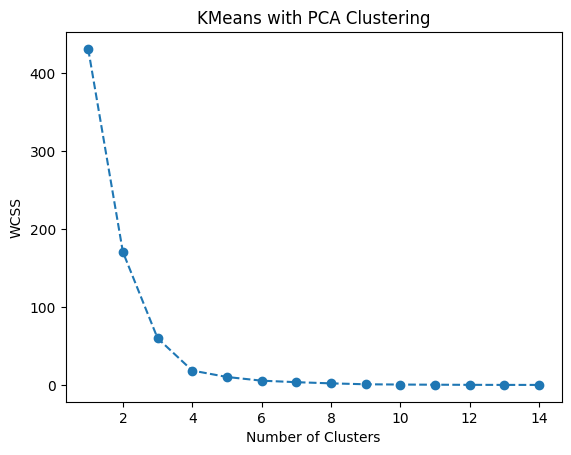

In [44]:
#plt.figure(figsize = (10,8))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title("KMeans with PCA Clustering")
plt.show()

### From the graph we determine the number of clusters to keep using elbow method = 4 clusters

## Modeling

In [45]:
# four clusters chosen, so we run Kmeans with the number of clusters equal to four
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# fit data with the kmeans pca model
kmeans_pca.fit(train_model)
cluster = kmeans_pca.predict(train_model)

In [46]:
# Create new data frame with original features and add the PCA scores and assigned clusters.

df_pca_kmeans = pd.concat([train_scaled.reset_index(drop = True), pd.DataFrame(train_model)], axis = 1)
df_pca_kmeans.columns.values[-3:] = ['component_1','component_2','component_3']
df_pca_kmeans['KMeans_PCA'] = kmeans_pca.labels_
df_pca_kmeans.head()

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,destroyers,external_debt,...,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength,component_1,component_2,component_3,KMeans_PCA
0,-0.7205059023,-0.5437456167,-0.8701786105,-0.6130436547,-0.6606898500,-0.4232531625,-0.5887508009,-0.4417397400,-0.5991105531,-0.2564075991,...,-0.4365060629,-0.4204360241,-0.5266712506,-0.5256684017,-0.7558482863,-0.8366578036,-2.9267690521,0.6272309588,0.7315204173,1
1,2.7721509833,0.0572363807,1.6814521524,0.8621047898,0.6379270645,3.5290762517,2.0701237837,0.7279132861,1.0384582921,-0.2755502442,...,3.4980318254,-0.0047992432,0.4627809110,0.2628057796,2.6719632814,1.5503409529,7.7326486182,-6.6352167398,-3.0298553817,2
2,-0.4400075514,-0.5437456167,-0.5142647755,-0.0013145510,-0.4316393206,-0.4137705314,-0.4368151103,-0.3259070825,-0.5991105531,-0.6355177571,...,-0.4456468615,-0.3313709996,-0.4752197382,-0.3907014849,-0.5426759252,-0.4202839866,-2.2922907927,0.3519465996,1.6712544080,1
3,-0.6300225633,-0.5437456167,-0.6222283553,-0.4974372224,-0.6009375380,-0.4104336550,-0.5127829556,-0.4884381323,-0.5991105531,-0.6065540820,...,-0.4358039500,-0.4782501628,-0.4752197382,-0.5024311731,-0.7473213919,-0.6016023927,-3.1439352818,0.3881603855,0.1505201079,1
4,-0.4128625497,0.2575637132,-0.5677890926,-0.4754046064,-0.3778622398,-0.2236433306,-0.3608472651,-0.3182565654,0.8387547744,0.1640927506,...,-0.1855434010,0.0358269083,-0.4356416518,-0.1909568144,-0.1504387806,-0.5592763329,-0.9471955508,0.7494665991,-1.0517972219,1


In [47]:
# create new column named Clusters and map the four clusters directly inside it.
df_pca_kmeans['clusters'] = df_pca_kmeans['KMeans_PCA'].map({0:'1', 1:'2', 2:'3', 3:'4'})

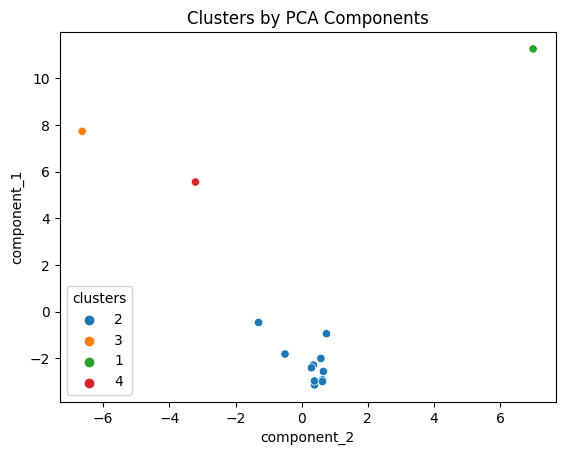

In [48]:
# Plots data by PCA Components.
x_axis = df_pca_kmeans['component_2']
y_axis = df_pca_kmeans['component_1']
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['clusters'])
plt.title('Clusters by PCA Components')
plt.show()

In [49]:
# creates a new data frame with components and cluster only

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(train_model)

train_pca = pd.DataFrame(data=pca_fit, columns=['component_1', 'component_2','component_3'])
train_pca['cluster'] = kmeans_pca.predict(train_model)
train_pca.head()

,component_1,component_2,component_3,cluster
0,-2.9267690521,0.6272309588,0.7315204173,1
1,7.7326486182,-6.6352167398,-3.0298553817,2
2,-2.2922907927,0.3519465996,1.6712544080,1
3,-3.1439352818,0.3881603855,0.1505201079,1
4,-0.9471955508,0.7494665991,-1.0517972219,1
